## Seattle Terry Stops Model
This is the the third workbook for the Seattle Terry Stops project. In this part our objectives will be to:
* creating the best model that predicts the likelihood of an arrest during a Terry Stop


## Loading the data
Let us start by loading the data we will use for this process.

In [3]:
# Importing the relevant libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data
df = pd.read_csv('data/clean_Terry_stops_dummies.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.describe()

,weapon_type,officer_id,officer_race,subject_perceived_race,initial_call_type,final_call_type,call_type,precinct,sector,beat,incident_year,incident_month,officer_age
count,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000,47038.000000
mean,3.207364,747.818190,5.656724,4.449254,106.012543,72.620753,0.862771,2.601174,8.303138,25.079765,4.191292,6.421149,13.163442
std,3.869788,300.289007,2.289589,2.775514,54.449820,36.576066,1.109185,1.928942,5.156242,14.285145,2.590837,3.325632,8.107626
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-1.000000,554.000000,5.000000,1.000000,48.000000,45.000000,0.000000,1.000000,4.000000,12.000000,2.000000,4.000000,7.000000
50%,7.000000,770.000000,7.000000,5.000000,121.000000,89.000000,0.000000,2.000000,8.000000,25.000000,4.000000,6.000000,11.000000
75%,7.000000,1000.000000,7.000000,7.000000,155.000000,100.000000,2.000000,5.000000,13.000000,37.000000,6.000000,9.000000,17.000000
max,7.000000,1309.000000,7.000000,7.000000,179.000000,194.000000,3.000000,5.000000,18.000000,51.000000,9.000000,12.000000,50.000000


The data we are using for this process has 47000 rows as compared to the same data we used for the EDA. This is because this data is specifically meant for modelling and is tediously cleaned.

In [6]:
# Getting the info of our dataset
df['arrested'] = df['arrest_flag_Y'].apply(lambda x: '1.0' if x == '1.0' else 'N')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47038 entries, 0 to 47037
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   weapon_type                                   47038 non-null  int64 
 1   officer_id                                    47038 non-null  int64 
 2   officer_race                                  47038 non-null  int64 
 3   subject_perceived_race                        47038 non-null  int64 
 4   initial_call_type                             47038 non-null  int64 
 5   final_call_type                               47038 non-null  int64 
 6   call_type                                     47038 non-null  int64 
 7   precinct                                      47038 non-null  int64 
 8   sector                                        47038 non-null  int64 
 9   beat                                          47038 non-null  int64 
 10

In [7]:
df['arrested'].value_counts()

arrested
N    47038
Name: count, dtype: int64

Our dataset contains 47038 rows and 33 columns.

In [ ]:
# Changing the dtype of our dataset to float
for col in df.columns:
    df[col] = df[col].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47038 entries, 0 to 47037
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   weapon_type                                   47038 non-null  float64
 1   officer_id                                    47038 non-null  float64
 2   officer_race                                  47038 non-null  float64
 3   subject_perceived_race                        47038 non-null  float64
 4   initial_call_type                             47038 non-null  float64
 5   final_call_type                               47038 non-null  float64
 6   call_type                                     47038 non-null  float64
 7   precinct                                      47038 non-null  float64
 8   sector                                        47038 non-null  float64
 9   beat                                          47038 non-null 

Ok now let us prepare our dataset for modeling 


In [ ]:
# Identifying our features and target
X = df.drop('arrest_flag_Y', axis=1)
y = df['arrest_flag_Y']

# Splitting our data into training and testing sets with 20% test size and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the training and testing sets using the standard scaler algorithm
scaler = StandardScaler()

# Fitting and transforming the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [ ]:
# Starting with a basic logistic regression as our baseline model
model = LogisticRegression(fit_intercept=False, C=1e16)

# Fitting the model to our training data
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1e+16, fit_intercept=False)

## Prediction
Let us  evaluate the predictions.

In [ ]:
# Predicting on the train and test data
y_hat_train = model.predict(X_train_scaled)
y_hat_test = model.predict(X_test_scaled)

# Calculating the accuracy score
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)

print('Train Accuracy:', accuracy_train)
print('Test Accuracy:', accuracy_test)
print()
# Calculating the precision score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)

print('Train Precision:', precision_train)
print('Test Precision:', precision_test)
print()
# Calculating the recall score
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)

print('Train Recall:', recall_train)
print('Test Recall:', recall_test)
print()
# Calculating the f1 score
f1 = f1_score(y_test, y_hat_test)

print('Train F1 Score:', f1)

Train Accuracy: 0.767083763591083
Test Accuracy: 0.7602040816326531

Train Precision: 0.368546727048168
Test Precision: 0.34709627628786416

Train Recall: 1.0
Test Recall: 1.0

Train F1 Score: 0.5153251217416213


Our training and test accuracy values almost identical which could be an indication of no over or under fittings. This is good but we need to try more options to get to a conclusion.

## Confusion Matrix
Let us check the confusion matrix results 

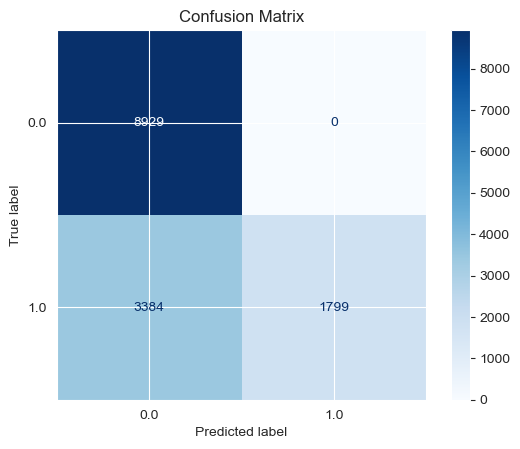

In [ ]:
# Import the confusion matrix plot module
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
cm = confusion_matrix(y_hat_test, y_test)
# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def print_metrics(y_test, y_hat_test):
    print("Precision Score: {}".format(precision_score(y_test, y_hat_test)))
    print("Recall Score: {}".format(recall_score(y_test, y_hat_test)))
    print("Accuracy Score: {}".format(accuracy_score(y_test, y_hat_test)))
    print("F1 Score: {}".format(f1_score(y_test, y_hat_test)))
    
print_metrics(y_test, y_hat_test)

Precision Score: 0.34709627628786416
Recall Score: 1.0
Accuracy Score: 0.7602040816326531
F1 Score: 0.5153251217416213


The model under fit. This could be due to class imbalance which needs to be looked at.

In [ ]:
y.value_counts()

arrest_flag_Y
0.0    40763
1.0     6275
Name: count, dtype: int64

Looks like there are about 8 non-arrests for every 1 arrest. This is a big gap. Let us see if we can fix it. We are going to define a function that will help us plot and measure the ROC curve and the AUC.

In [ ]:
# Defining a function that will help us plot and measure the ROC curve
def plot_roc(model, X_test, y_test):
    """
    Input the X_test set, the y_test set
    
    The function calculates the y_score, fpr, tpr, and thresholds.
    
    Outputs the Area Under the Curve and a plot of the ROC Curve
    """
    # y_score 
    y_score = model.predict(X_test)
    # False positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print(f'AUC: {auc(fpr, tpr)}')
    sns.set_style('darkgrid')
    plt.figure(figsize=(13, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

AUC: 0.8625842605376431


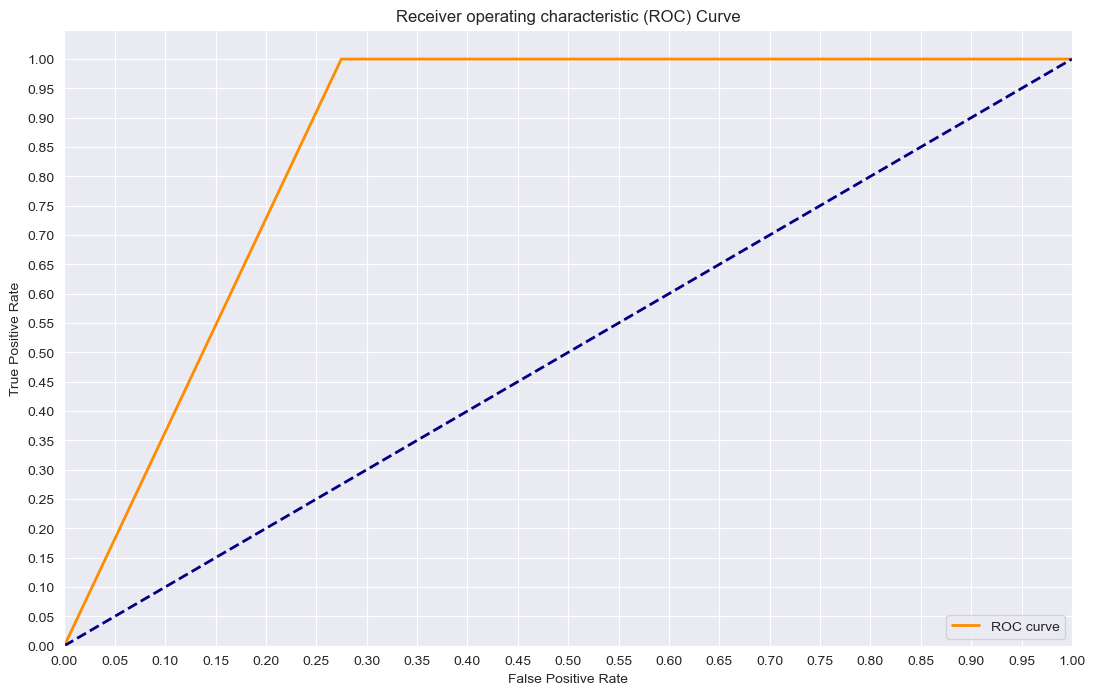

In [ ]:
# Running the function
from sklearn.metrics import roc_curve, auc
plot_roc(model, X_test_scaled, y_test)

Alright let us tune our baseline model. We are going to use the SMOTE process in tuning our model

In [ ]:
def logreg_smote(ratios, names, X_train, X_test):
    """
    Input a list of ratios and a list of names associated with those weights
    as well as the test and train sets for X (scaled or unscaled).
    
    The algorithm will run each ratio, fit a model using the ratio 
    parameters, and print the resulting model.
    
    Then it will run predictions and calculate the y_score, fpr, tpr, and 
    thresholds.  
    
    After that, it will print the Precision, Recall, Accuracy, and F1 Score
    
    Next it calculates and prints AUC for each respective name.
    
    Last, it will plot the resulting ROC Curve.
    """
    colors = sns.color_palette('Set2')
    plt.figure(figsize=(13,8))
    sns.set_style('darkgrid')
    for n, ratio in enumerate(ratios):
        # Fit a model
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, 
                                                                y_train) 
        logreg = LogisticRegression(fit_intercept=False, 
                                    C=1e20, solver ='lbfgs')
        model_log = logreg.fit(X_train_resampled, y_train_resampled)
        print(model_log)

        # Predict, calculate y_score, fpr and tpr
        y_hat_test = logreg.predict(X_test)

        y_score = logreg.fit(X_train, y_train).decision_function(X_test)
        
        # Metric Evaluation
        model_eval = print_metrics(y_test, y_hat_test)
        print(f'Metrics = {model_eval}')
        
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        # calculate and print respective AUC scores
        print(f'AUC for {names[n]}: {auc(fpr, tpr)}')
        print('-------------------------------------------------------------')
        lw = 2
        plt.plot(fpr, tpr, color=colors[n],
                 lw=lw, label=f'ROC curve {names[n]}')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

LogisticRegression(C=1e+20, fit_intercept=False)
Precision Score: 0.3505455962587685
Recall Score: 1.0
Accuracy Score: 0.7638180272108843
F1 Score: 0.5191170105323907
Metrics = None
AUC for 0.1: 0.9993881564367473
-------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
Precision Score: 0.3505455962587685
Recall Score: 1.0
Accuracy Score: 0.7638180272108843
F1 Score: 0.5191170105323907
Metrics = None
AUC for 0.25: 0.9993881564367473
-------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
Precision Score: 0.3505455962587685
Recall Score: 1.0
Accuracy Score: 0.7638180272108843
F1 Score: 0.5191170105323907
Metrics = None
AUC for 0.33: 0.9993881564367473
-------------------------------------------------------------
LogisticRegression(C=1e+20, fit_intercept=False)
Precision Score: 0.3505455962587685
Recall Score: 1.0
Accuracy Score: 0.7638180272108843
F1 Score: 0.5191170105323907
Met

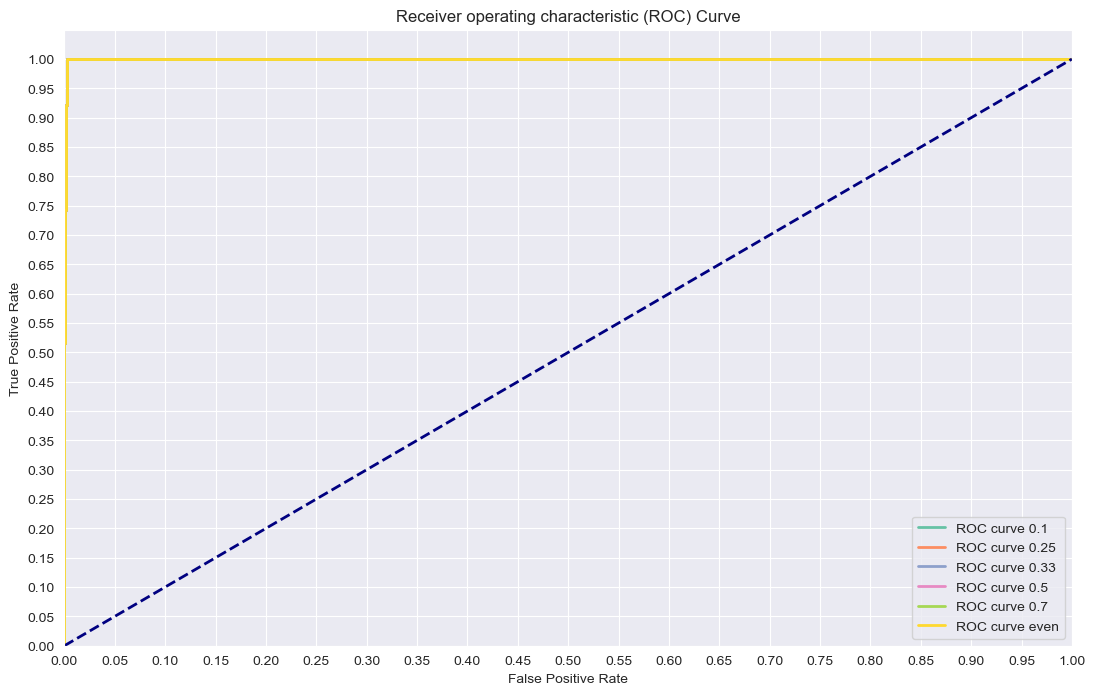

In [ ]:
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1.0]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']

logreg_smote(ratios, names, X_train_scaled, X_test_scaled)

## Conclusion:
Although there is a class imbalance problem, Logistic Regression may not be the best method of handling this data. Time to move on. 

# Decision Tree
We'll take a step backward and try a Decision Tree. We'll also adjust the function we used to make the random forest and generalize it. First, let's just make a vanilla Decision Tree.

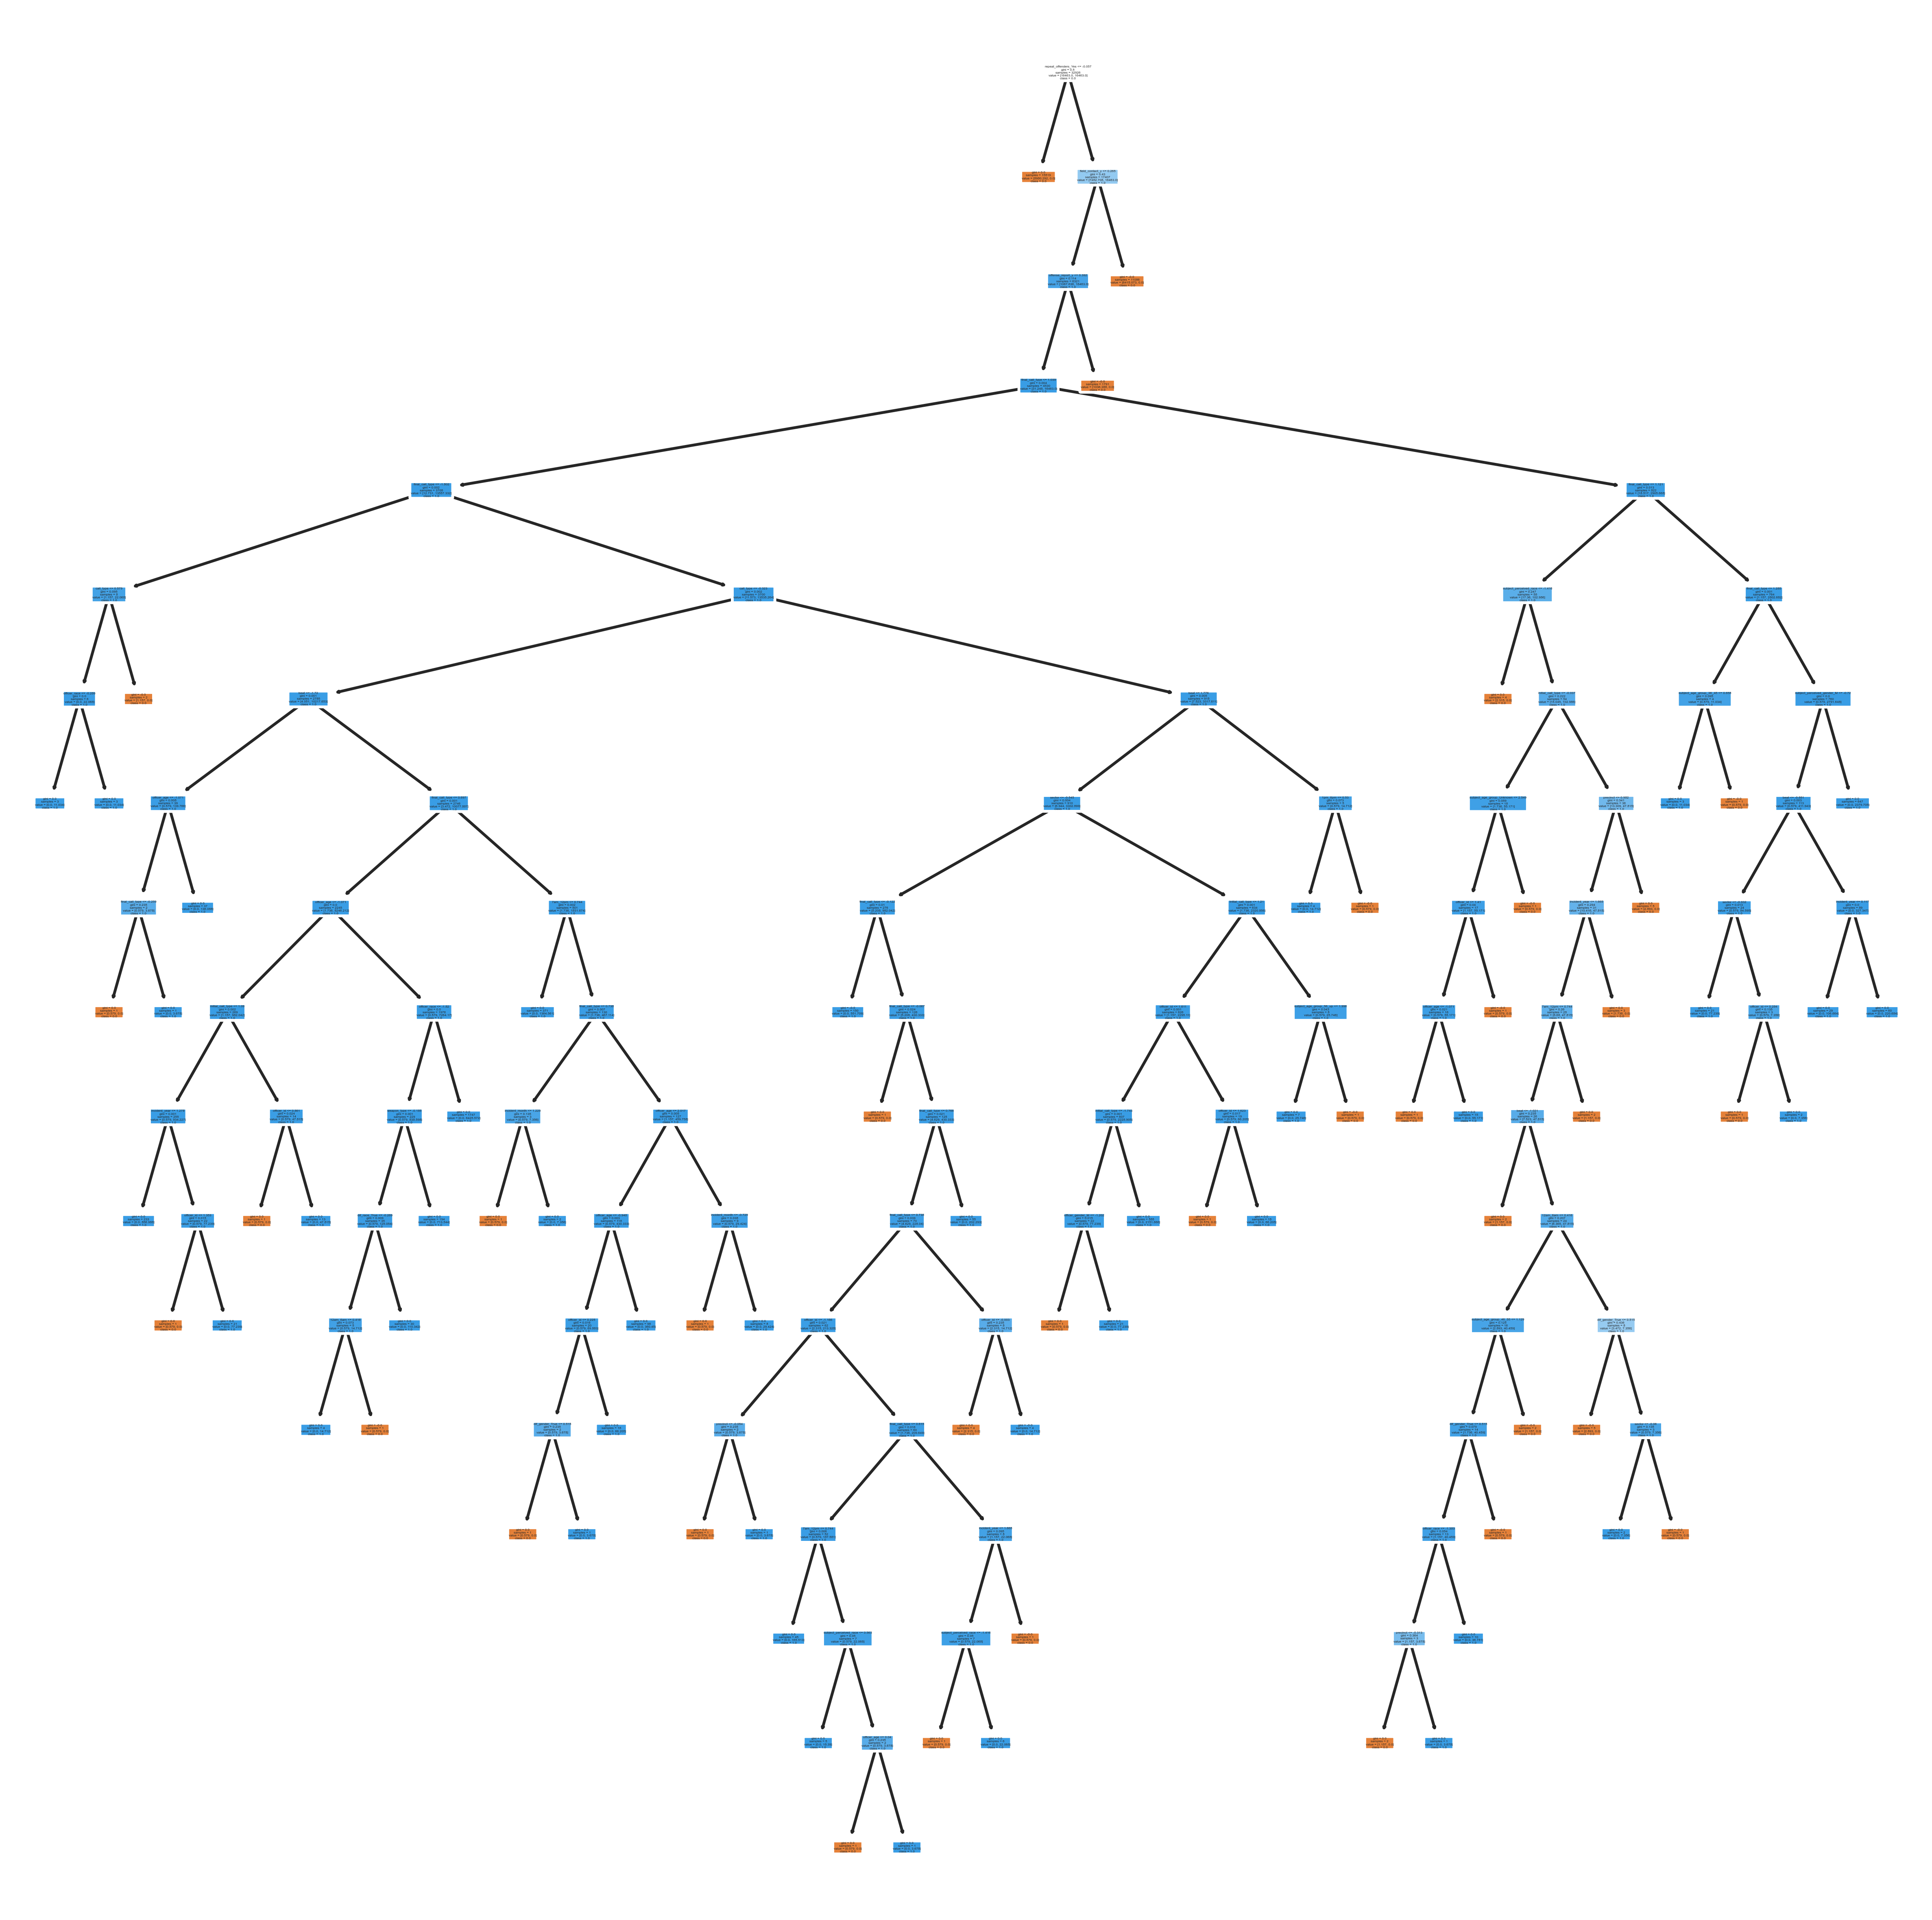

In [ ]:
# Train Decision Tree
clf_dt = DecisionTreeClassifier(random_state=42, criterion='gini', class_weight='balanced')
clf_dt.fit(X_train_scaled, y_train)

# Plotting decision tree
from sklearn import tree

plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(clf_dt, feature_names=X.columns, class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

## Metrics & Confusion Matrix

In [ ]:
# Calculate the evaluation metrics
y_hat_test_dt = clf_dt.predict(X_test_scaled)

print_metrics(y_test, y_hat_test_dt)

Precision Score: 0.9927374301675977
Recall Score: 0.9877709838799333
Accuracy Score: 0.9975198412698413
F1 Score: 0.9902479799387016


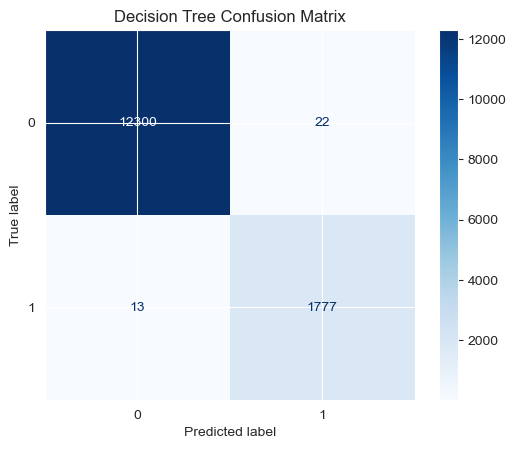

In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_hat_test_dt, y_test)
# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  
plt.title('Decision Tree Confusion Matrix')
plt.show()

It looks like the Decision Tree performed better than the Random Forest.  I don't see an reason to fine-tune the hyper-parameters.  So let's just check out the feature importances and the ROC Curve.

## Feature Importance

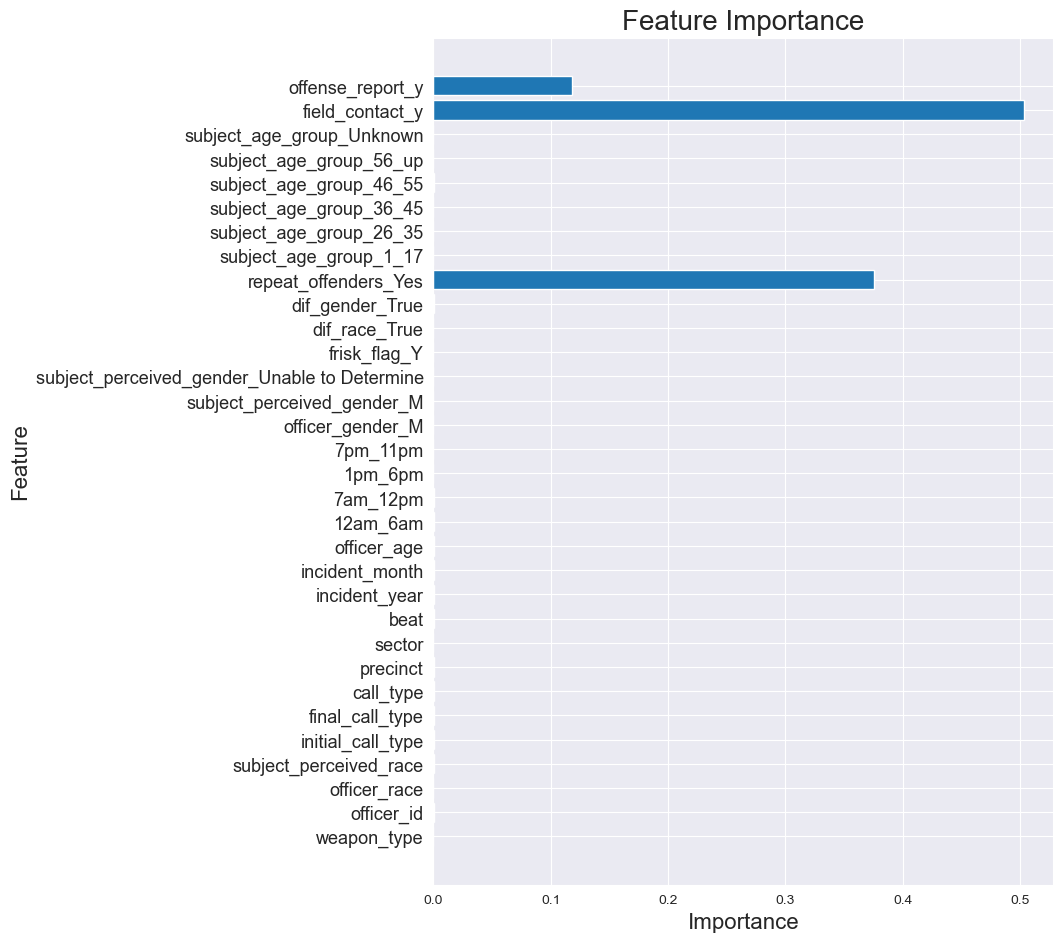

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 11))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize=13) 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)

plot_feature_importances(clf_dt)

## ROC Curve

AUC: 0.9933575945956964


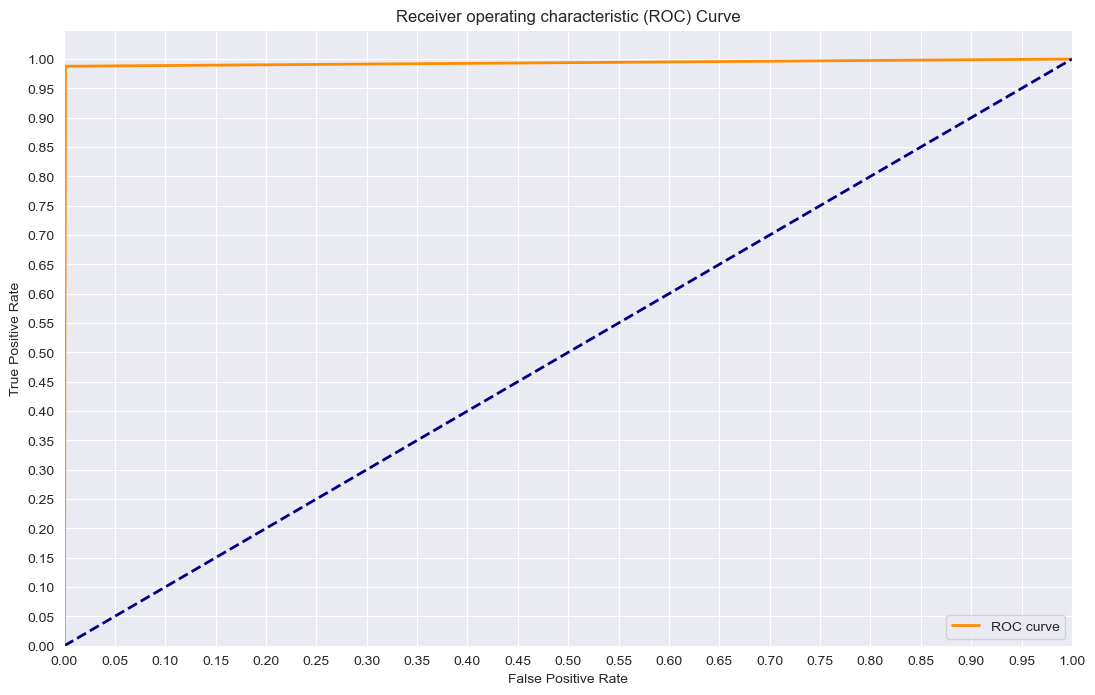

In [ ]:
plot_roc(clf_dt, X_test_scaled, y_test)

# K-Nearest Neighbors 
Let's keep moving along and testing out other modeling methods.

In [ ]:
from sklearn.pipeline import Pipeline

# fit the model
scaled_pipeline_knn = Pipeline([('ss', StandardScaler()),
                            ('knn', KNeighborsClassifier())])
scaled_pipeline_knn.fit(X_train, y_train)

#calculate y_hat_test
y_hat_test = scaled_pipeline_knn.predict(X_test)

# print metric evaluation
print_metrics(y_test, y_hat_test)

Precision Score: 0.9196658097686375
Recall Score: 0.7954419121734296
Accuracy Score: 0.9650651927437641
F1 Score: 0.8530551415797317


KNN doesn't seem to be a good fit for this data, but let's see what's happening.  High accuracy, but there is a bit of a gap between precision and recall, pointing toward overfitting. Let's look at the the ROC curve and the Confusion Matrix.

## KNN Confusion Matrix and ROC Curve

plot_confusion_matrix(scaled_pipeline_knn, X_test, y_test, cmap=plt.cm.Blues)

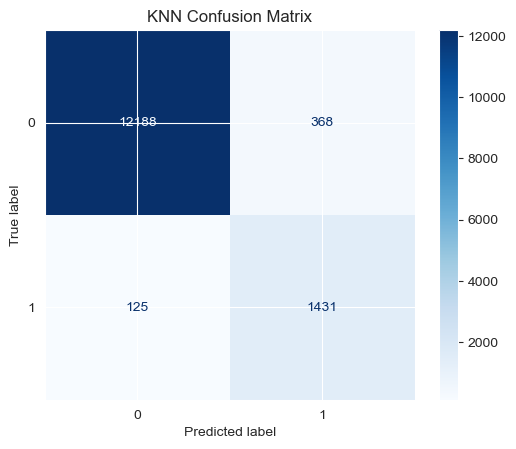

In [ ]:
cm = confusion_matrix(y_hat_test, y_test)
# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  
plt.title('KNN Confusion Matrix')
plt.show()

AUC: 0.892645020084116


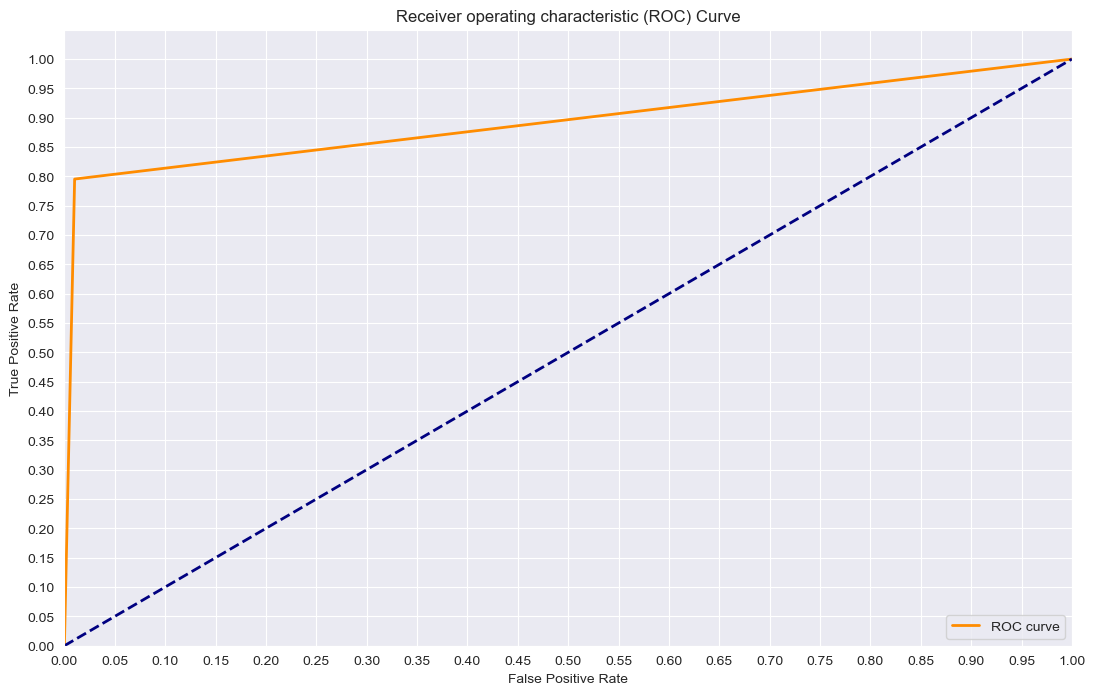

In [ ]:
plot_roc(scaled_pipeline_knn, X_test, y_test)